# Data Exploration

### Download Data

In [ ]:
!nvidia-smi

Sat Oct 21 13:07:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os

In [ ]:
if not os.path.exists("data"):
    !mkdir data

In [ ]:
import gdown

In [ ]:
urls_text = ['https://drive.google.com/uc?export=download&id=1quzgf6avpMMY6I4bL_sKLPpy_NC99vcz','https://drive.google.com/uc?export=download&id=1gvy9PQHNX_loQE7Caf3cSQKBzVP6AW45']
urls_video = ['https://drive.google.com/uc?export=download&id=1d9bis-wJlG-n3iwFXlXm5lj6Zou6SDWi','https://drive.google.com/uc?export=download&id=1igyOTnjp2YUNbftcl1jmfKWYXc3MBDrv','https://drive.google.com/uc?export=download&id=14ovFQ22U1eaXzva1EslPHLR-3cRJ8Ptp']
output_text = ['data/subtask1.json','data/subtask2.json']
output_video = ['data/videos_train', 'data/videos_val', 'data/videos_test']

In [ ]:
for url, out in zip(urls_text, output_text):
    gdown.download(url, out, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1quzgf6avpMMY6I4bL_sKLPpy_NC99vcz
To: /content/data/subtask1.json
100%|██████████| 25.6M/25.6M [00:00<00:00, 40.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1gvy9PQHNX_loQE7Caf3cSQKBzVP6AW45
To: /content/data/subtask2.json
100%|██████████| 4.45M/4.45M [00:00<00:00, 38.6MB/s]


In [ ]:
# for url, out in zip(urls_video, output_video):
    # gdown.download(url, out, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1d9bis-wJlG-n3iwFXlXm5lj6Zou6SDWi
To: /content/data/videos_train
 80%|████████  | 5.94G/7.40G [00:45<00:14, 102MB/s] 

KeyboardInterrupt: ignored

## Subtask 1 : Cause extraction using given emotion utterance

In [ ]:
import json
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file = open('./data/subtask1.json', 'r', encoding='utf-8')
data = json.load(file)

In [ ]:
print(data[0])

{'emotion_utterance_ID': 'dia1utt3', 'emotion': 'surprise', 'conversation': [{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral', 'video_name': 'dia1utt1.mp4'}, {'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral', 'video_name': 'dia1utt2.mp4'}, {'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise', 'video_name': 'dia1utt3.mp4'}, {'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise', 'video_name': 'dia1utt4.mp4'}, {'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger', 'video_name': 'dia1utt5.mp4'}, {'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral', 'video_name': 'dia1utt6.mp4'}, {'utterance_ID': 7, 'text

In [ ]:
print("Number of samples = {}".format(len(data)))

Number of samples = 7081


In [ ]:
emotions = {'neutral':0,'anger':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0}
num_of_utt_in_convo = {}
len_of_utt = []

for convo in data:
    num_utt = 0
    for utt in convo['conversation']:
        emotions[utt['emotion']] += 1
        num_utt += 1
        words = nltk.word_tokenize(utt['text'])
        len_of_utt.append(len(words))
    if num_utt in num_of_utt_in_convo.keys():
        num_of_utt_in_convo[num_utt] += 1
    else:
        num_of_utt_in_convo[num_utt] = 1

#### Number of utterances in each conversastion

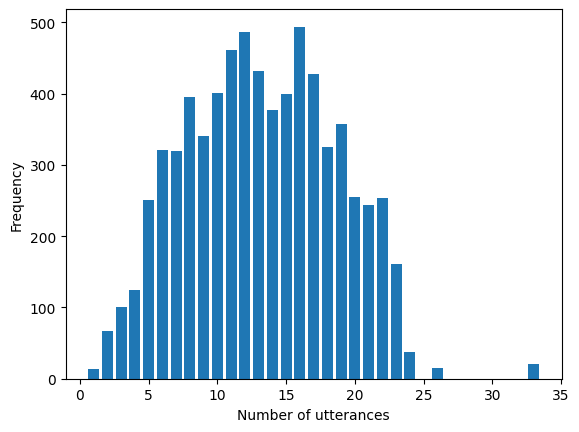

In [ ]:
plt.bar(num_of_utt_in_convo.keys(), num_of_utt_in_convo.values())
plt.xlabel('Number of utterances')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len_of_convo = [k for k in num_of_utt_in_convo.keys() for i in range(num_of_utt_in_convo[k])]

print(len_of_convo)
avg_convo_len = np.mean(len_of_convo)
max_convo_len = np.max(len_of_convo)
min_convo_len = np.min(len_of_convo)

print("Average length of a conversation: {}".format(avg_convo_len))
print("Max length of a conversation: {}".format(max_convo_len))
print("Min length of a conversation: {}".format(min_convo_len))

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

#### Emotions

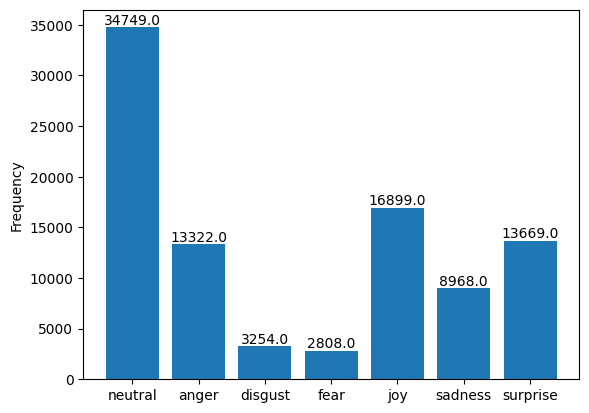

In [ ]:
# Number of each emotion
fig, ax = plt.subplots()
bars = ax.bar(emotions.keys(), emotions.values())
ax.bar_label(bars, fmt='%.1f')
plt.ylabel('Frequency')
plt.show()

#### Lengths of utterances

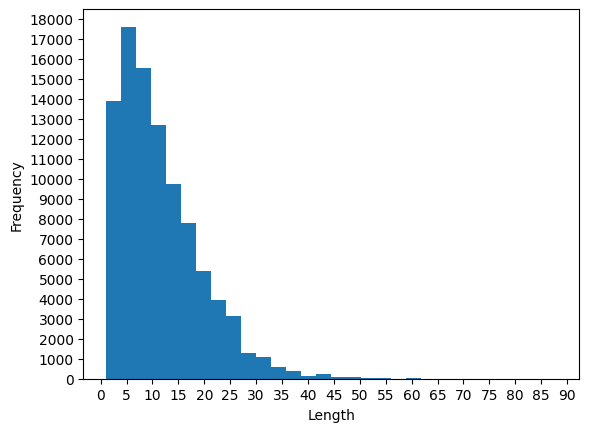

In [ ]:
plt.hist(len_of_utt, bins=30)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.locator_params(axis='x', nbins=30)
plt.locator_params(axis='y', nbins=20)
plt.show()

In [ ]:
avg_utt_len = np.mean(len_of_utt)
max_utt_len = np.max(len_of_utt)
min_utt_len = np.min(len_of_utt)

print("Average length of an utterance: {}".format(avg_utt_len))
print("Max length of an utterance: {}".format(max_utt_len))
print("Min length of an utterance: {}".format(min_utt_len))

Average length of an utterance: 11.332105605910174
Max length of an utterance: 88
Min length of an utterance: 1


## Subtask 2 : Extracting emotions and causes

In [ ]:
file = open('./data/subtask2.json', 'r', encoding='utf-8')
data2 = json.load(file)

In [ ]:
print(data2[0])

{'conversation_ID': 1, 'conversation': [{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral', 'video_name': 'dia1utt1.mp4'}, {'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral', 'video_name': 'dia1utt2.mp4'}, {'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise', 'video_name': 'dia1utt3.mp4'}, {'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise', 'video_name': 'dia1utt4.mp4'}, {'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger', 'video_name': 'dia1utt5.mp4'}, {'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral', 'video_name': 'dia1utt6.mp4'}, {'utterance_ID': 7, 'text': 'No .', 'speaker': 'Phoebe', 'emot

In [ ]:
print("Number of samples = {}".format(len(data2)))

Number of samples = 1374


In [ ]:
emotions2 = {'neutral':0,'anger':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0}
num_of_utt_in_convo2 = {}
len_of_utt2 = []
num_pairs = []
all_pairs = []
relative_distances = {}
total_utterances = 0
num_pairs_same_speakers = 0
total_pairs = 0

for convo in data2:
    num_utt = 0
    # Relating to utterances
    for utt in convo['conversation']:
        emotions2[utt['emotion']] += 1
        num_utt += 1
        total_utterances += 1
        words = nltk.word_tokenize(utt['text'])
        len_of_utt2.append(len(words))
    if num_utt in num_of_utt_in_convo2.keys():
        num_of_utt_in_convo2[num_utt] += 1
    else:
        num_of_utt_in_convo2[num_utt] = 1
    # Relating to emotion-cause pairs
    num_prs = 0
    pairs = []
    for pair in convo['emotion-cause_pairs']:
        num_prs += 1
        emotion_num = pair[0].split('_')[0]
        emotion = pair[0].split('_')[1]
        pairs.append([int(emotion_num), emotion, int(pair[1])])

        # Check of speaker of emotion and cause same
        if (convo['conversation'][int(emotion_num)-1]['speaker'] == convo['conversation'][int(pair[1])-1]['speaker']):
            num_pairs_same_speakers += 1

        # Find relative distance
        d = int(emotion_num) - int(pair[1])
        if d in relative_distances:
            relative_distances[d] += 1
        else:
            relative_distances[d] = 1
    all_pairs.append(pairs)
    num_pairs.append(num_prs)
    total_pairs += num_prs


In [ ]:
print("Total utterances = {}".format(total_utterances))

Total utterances = 13619


#### Number of utterances in each conversation

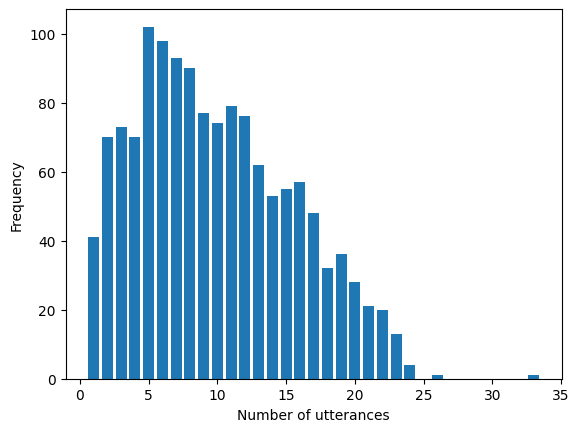

In [ ]:
plt.bar(num_of_utt_in_convo2.keys(), num_of_utt_in_convo2.values())
plt.xlabel('Number of utterances')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len_of_convo2 = [k for k in num_of_utt_in_convo2.keys() for i in range(num_of_utt_in_convo2[k])]

avg_convo_len2 = np.mean(len_of_convo2)
max_convo_len2 = np.max(len_of_convo2)
min_convo_len2 = np.min(len_of_convo2)

print("Average length of an conversation: {}".format(avg_convo_len2))
print("Max length of an conversation: {}".format(max_convo_len2))
print("Min length of an conversation: {}".format(min_convo_len2))

Average length of an conversation: 9.91193595342067
Max length of an conversation: 33
Min length of an conversation: 1


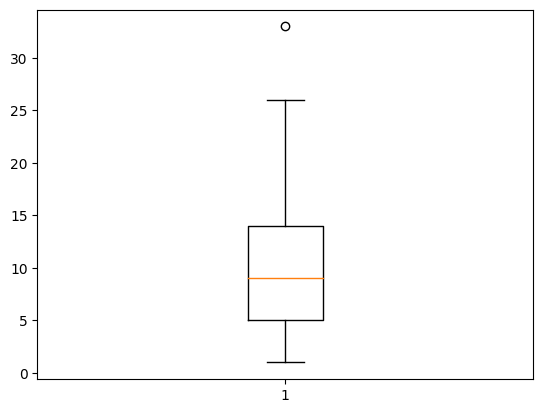

In [ ]:
plt.boxplot(len_of_convo2)
plt.show()

#### Emotions

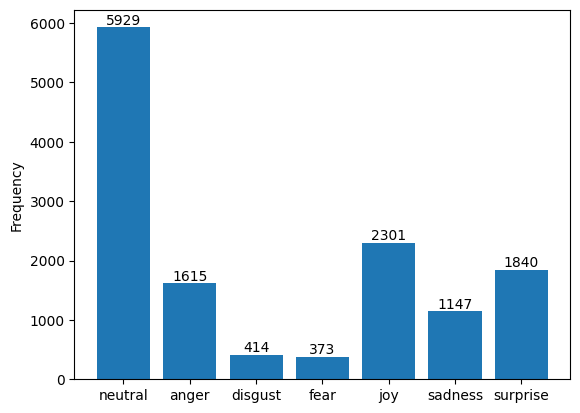

In [ ]:
# Number of each emotion
fig, ax = plt.subplots()
bars = ax.bar(emotions2.keys(), emotions2.values())
ax.bar_label(bars)
plt.ylabel('Frequency')
plt.show()

#### Lengths of Utterances

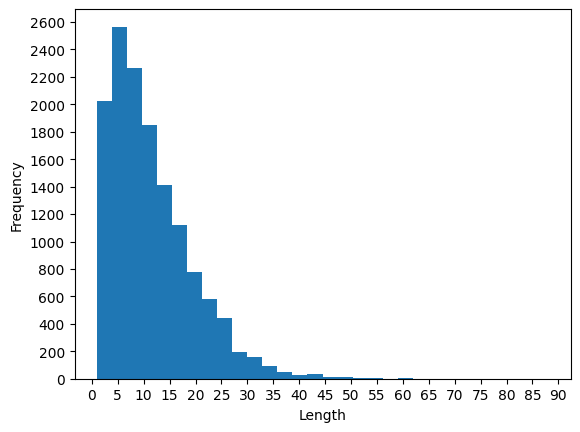

In [ ]:
plt.hist(len_of_utt2, bins=30)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.locator_params(axis='x', nbins=30)
plt.locator_params(axis='y', nbins=20)
plt.show()

In [ ]:
avg_utt_len2 = np.mean(len_of_utt2)
max_utt_len2 = np.max(len_of_utt2)
min_utt_len2 = np.min(len_of_utt2)

print("Average length of an utterance: {}".format(avg_utt_len2))
print("Max length of an utterance: {}".format(max_utt_len2))
print("Min length of an utterance: {}".format(min_utt_len2))

Average length of an utterance: 11.312504589176886
Max length of an utterance: 88
Min length of an utterance: 1


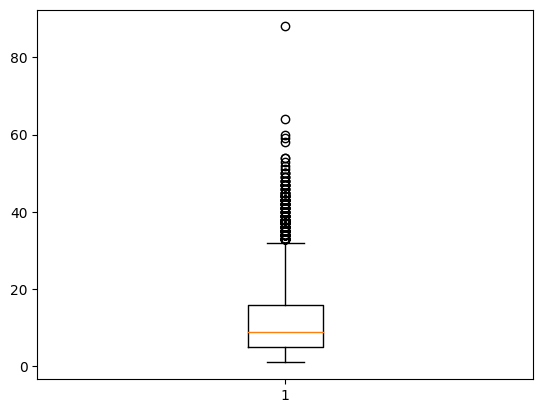

In [ ]:
plt.boxplot(len_of_utt2)
plt.show()

#### Number of emotion-cause pairs per conversation

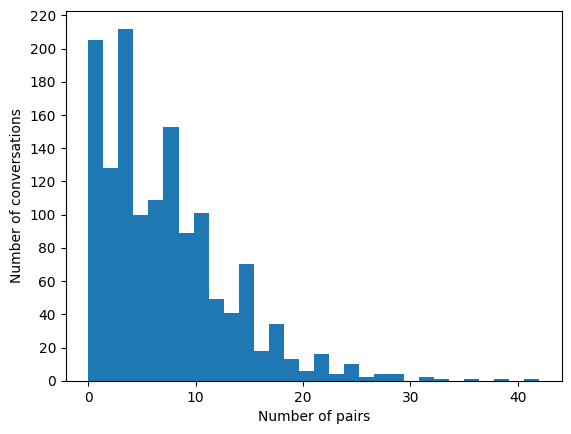

In [ ]:
fig, ax = plt.subplots()
bars = ax.hist(num_pairs, bins = 30)
plt.xlabel('Number of pairs')
plt.ylabel('Number of conversations')
plt.locator_params(axis='y', nbins=20)
plt.show()

#### Number of causes for a single emotion utterance

In [ ]:
num_of_causes = {}
for pairs in all_pairs:
    emo_causes_num = {}
    for pair in pairs:
        if pair[0] in emo_causes_num.keys():
            emo_causes_num[pair[0]] += 1
        else:
            emo_causes_num[pair[0]] = 1
    for k, v in emo_causes_num.items():
        if v in num_of_causes.keys():
            num_of_causes[v] += 1
        else:
            num_of_causes[v] = 1

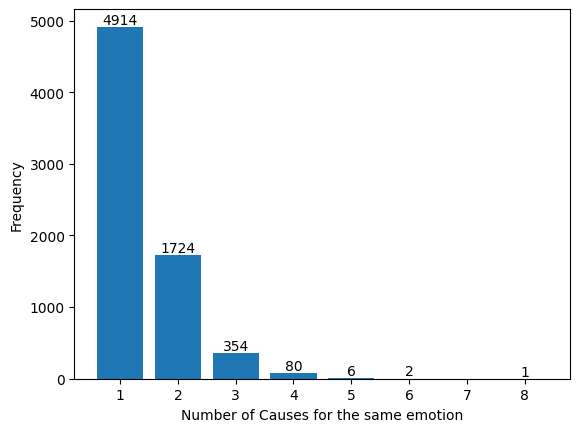

In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(num_of_causes.keys(), num_of_causes.values())
ax.bar_label(bars)
plt.xlabel('Number of Causes for the same emotion')
plt.ylabel('Frequency')
plt.show()

#### Relative Distances between emotion-cause pairs

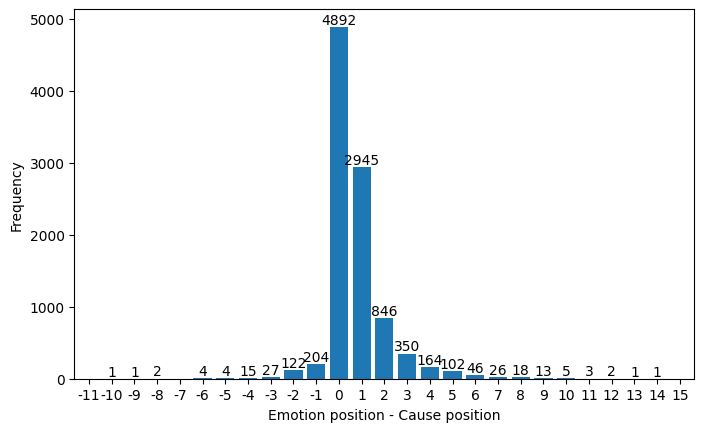

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
bars = ax.bar(relative_distances.keys(), relative_distances.values())
ax.bar_label(bars)
plt.xticks(ticks=range(-11, 16, 1), labels=range(-11, 16, 1))
plt.xlabel('Emotion position - Cause position')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Percentage of causes ahead of the emotion utterance
num_causes_ahead = 0
for k, v in relative_distances.items():
    if k < 0:
        num_causes_ahead += v
print("Number of causes ahead of emotion utterance = {}".format(num_causes_ahead))
print("Percentage of causes ahead of emotion = {:.2f}%".format((num_causes_ahead/total_utterances)*100.0))

Number of causes ahead of emotion utterance = 380
Percentage of causes ahead of emotion = 2.79%


#### Number of pairs where speaker of cause utterance and emotion utterance was same

In [ ]:
print("Number where emotion-cause pair had same speaker = {}".format(num_pairs_same_speakers))
print("Total pairs = {}".format(total_pairs))

Number where emotion-cause pair had same speaker = 6455
Total pairs = 9794


In [ ]:
print("Percentage where emotion-cause pair had same speaker = {:.2f}".format((num_pairs_same_speakers/total_pairs)*100.0))

Percentage where emotion-cause pair had same speaker = 65.91


Involving speaker information while training may or may not help.